In [1]:
import numpy as np
import scipy
import cv2
import scipy.misc as misc
import matplotlib.pyplot as plt
import scipy.interpolate as interpol
%matplotlib inline

In [2]:
def extract(path,fruit_type,ct):
    for j in range(1,ct+1):
        im2 = misc.imread('sources/Identifier/identifier2.jpg')
        im1 = misc.imread('%s/%s%s.jpg' %(path,fruit_type,int(j)))
        
        orb = cv2.ORB(1500)
        pts1,dev1 = orb.detectAndCompute(im1,None)
        pts2,dev2 = orb.detectAndCompute(im2,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(dev1,dev2,k=2)
        best = []
        for m,n in matches:
            if m.distance < .85*n.distance:
                best.append([pts1[m.queryIdx],pts2[m.trainIdx]])
        best = np.array(best)
        best = np.array([np.array([[best[i,0].pt[0],best[i,0].pt[1]] for i in range(len(best))]),
                np.array([[best[i,1].pt[0],best[i,1].pt[1]] for i in range(len(best))])])
        h = cv2.findHomography(best[0],best[1],cv2.RANSAC,5.0)[0]
        im3 = cv2.warpPerspective(im1,h,(im2.shape[1],im2.shape[0]))

        misc.imsave('results/%s/%s%i.jpg'%(fruit_type,fruit_type,j),im3)
    print('finished: %s' % fruit_type)

In [3]:
extract('sources/pineapple','pinapple',50)
extract('sources/lemon','lemon',50)
extract('sources/tomato','tomato',50)

finished: pinapple
finished: lemon
finished: tomato


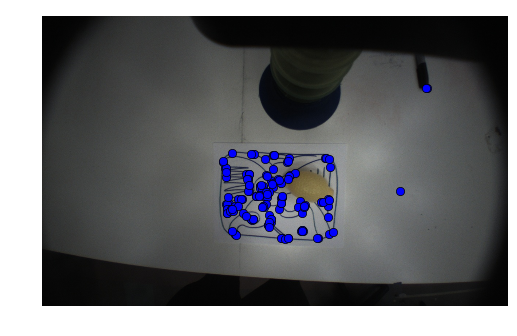

In [4]:
im2 = misc.imread('sources/Identifier/identifier2.jpg')
im1 = misc.imread('sources/lemon/lemon1.jpg')

sift = cv2.ORB(1500)
pts1,dev1 = sift.detectAndCompute(im1,None)
pts2,dev2 = sift.detectAndCompute(im2,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(dev1,dev2,k=2)
best = []
for m,n in matches:
    if m.distance < .85*n.distance:
        best.append([pts1[m.queryIdx],pts2[m.trainIdx]])
best = np.array(best)
best = np.array([np.array([[best[i,0].pt[0],best[i,0].pt[1]] for i in range(len(best))]),
        np.array([[best[i,1].pt[0],best[i,1].pt[1]] for i in range(len(best))])])
h = cv2.findHomography(best[0],best[1],cv2.RANSAC,5.0)[0]
im3 = cv2.warpPerspective(im1,h,(im2.shape[1],im2.shape[0]))

plt.plot(best[0][:,0],best[0][:,1],'o')
plt.imshow(im1)
plt.axis('off')
plt.savefig('lemon1.jpg',bbox_inches='tight')

(149L, 2L)


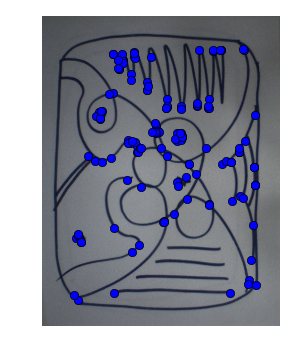

In [5]:
print(best[0].shape)
plt.plot(best[1][:,0],best[1][:,1],'o')
plt.imshow(im2)
plt.axis('off')
plt.savefig('identifierl.jpg',bbox_inches='tight')